In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import pickle

## Data overview

In [2]:
def plot_two_images(path1, path2):
    # changed RGB channels order
    image1 = cv2.imread(path1)[...,::-1]
    image2 = cv2.imread(path2)[...,::-1]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.show()

In [81]:
!tree tests/00_* --filelimit 20

tests/00_test_slam_check
├── gt
│   ├── depth  [100 entries exceeds filelimit, not opening dir]
│   ├── depth.txt
│   ├── ground_truth.txt
│   └── known_poses.txt
└── output
    ├── all_poses.txt
    └── scores.txt
tests/00_test_slam_gt
├── depth  [100 entries exceeds filelimit, not opening dir]
├── depth.txt
├── ground_truth.txt
└── known_poses.txt
tests/00_test_slam_input
├── intrinsics.txt
├── known_poses.txt
├── rgb  [50 entries exceeds filelimit, not opening dir]
├── rgb.txt
└── rgb_with_poses  [50 entries exceeds filelimit, not opening dir]

9 directories, 11 files


#### 00_test_slam_input

In [4]:
!cat tests/00_test_slam_input/intrinsics.txt

# fx fy cx cy
525.0 525.0 319.5 239.5

In [46]:
!head -3 tests/00_test_slam_input/known_poses.txt
!tail -2 tests/00_test_slam_input/known_poses.txt

#frame_id tx ty tz qx qy qz qw
0 1.3390429617085644 0.6235776860273197 1.6559810006210114 0.6574280826403377 0.612626168885718 -0.29491259746065657 -0.32481387472099443
1 1.2902835986760326 0.6285708143537809 1.6032623908566963 0.6617022564085415 0.6217021200078439 -0.2914009936790827 -0.3012010270972536
48 1.2942235000525888 0.9075855085542028 1.5820831701557923 0.7113084148283213 0.5721067680630995 -0.24320287710705435 -0.32800388030885624
49 1.2989792386058452 0.842189797134622 1.5980744319032658 0.7022582239008532 0.5867650943827719 -0.25388489683671744 -0.3131813693944856


In [6]:
!head -3 tests/00_test_slam_input/rgb.txt
!tail -3 tests/00_test_slam_input/rgb.txt

0 rgb_with_poses/000000.png
1 rgb_with_poses/000001.png
2 rgb_with_poses/000002.png
97 rgb/000097.png
98 rgb/000098.png
99 rgb/000099.png


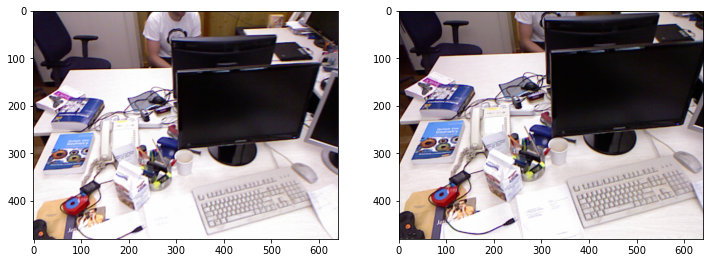

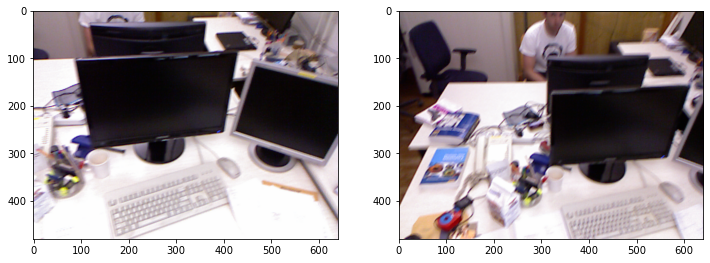

In [7]:
plot_two_images(
    'tests/00_test_slam_input/rgb_with_poses/000000.png',
    'tests/00_test_slam_input/rgb_with_poses/000001.png',
)
plot_two_images(
    'tests/00_test_slam_input/rgb/000050.png',
    'tests/00_test_slam_input/rgb/000051.png',
)

#### 00_test_slam_gt

In [8]:
!head -3 tests/00_test_slam_gt/depth.txt
!tail -3 tests/00_test_slam_gt/depth.txt

0 depth/000000.png
1 depth/000001.png
2 depth/000002.png
97 depth/000097.png
98 depth/000098.png
99 depth/000099.png


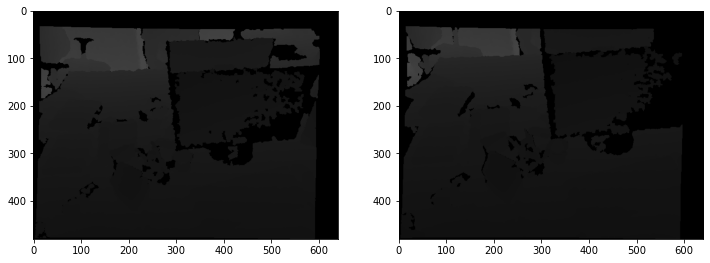

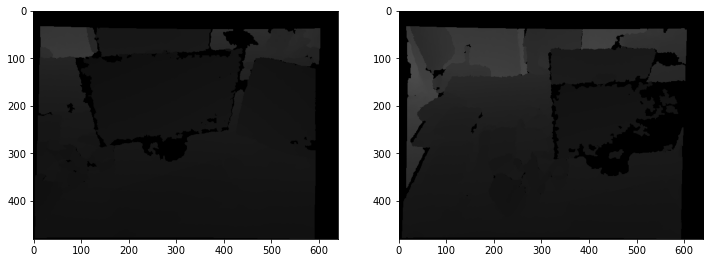

In [9]:
plot_two_images(
    'tests/00_test_slam_gt/depth/000000.png',
    'tests/00_test_slam_gt/depth/000001.png',
)
plot_two_images(
    'tests/00_test_slam_gt/depth/000050.png',
    'tests/00_test_slam_gt/depth/000051.png',
)

In [10]:
!head -3 tests/00_test_slam_gt/ground_truth.txt
!tail -2 tests/00_test_slam_gt/ground_truth.txt

#frame_id tx ty tz qx qy qz qw
0 1.3405 0.6266 1.6575 0.6574280826403377 0.612626168885718 -0.29491259746065657 -0.32481387472099443
1 1.2922 0.6256 1.6041 0.6617022564085415 0.6217021200078439 -0.2914009936790827 -0.3012010270972536
98 1.2983 0.9503 1.5831 0.7153771047221391 0.5626819916510312 -0.2389923511721991 -0.3383891700279171
99 1.2909 0.7687 1.5836 0.683398957817384 0.6049990773771106 -0.23319964437081347 -0.3354994883636704


In [11]:
!head -3 tests/00_test_slam_gt/known_poses.txt
!tail -2 tests/00_test_slam_gt/known_poses.txt

#frame_id tx ty tz qx qy qz qw
0 1.3390429617085644 0.6235776860273197 1.6559810006210114 0.6574280826403377 0.612626168885718 -0.29491259746065657 -0.32481387472099443
1 1.2902835986760326 0.6285708143537809 1.6032623908566963 0.6617022564085415 0.6217021200078439 -0.2914009936790827 -0.3012010270972536
48 1.2942235000525888 0.9075855085542028 1.5820831701557923 0.7113084148283213 0.5721067680630995 -0.24320287710705435 -0.32800388030885624
49 1.2989792386058452 0.842189797134622 1.5980744319032658 0.7022582239008532 0.5867650943827719 -0.25388489683671744 -0.3131813693944856


* 00_test_slam_gt <=> 00_test_slam_check/gt (same files)
* 00_test_slam_gt/known_poses.txt <=> 00_test_slam_input/known_poses.txt (same file)

#### 00_test_slam_check

In [12]:
!ls tests/00_test_slam_check/output

all_poses.txt scores.txt


In [13]:
!head -3 tests/00_test_slam_check/output/all_poses.txt
!tail -2 tests/00_test_slam_check/output/all_poses.txt

#frame_id tx ty tz qx qy qz qw
0 1.3390429617085644 0.6235776860273197 1.6559810006210114 0.6574280826403377 0.6126261688857181 -0.2949125974606566 -0.3248138747209945
1 1.2902835986760326 0.6285708143537809 1.6032623908566963 0.6617022564085416 0.6217021200078439 -0.29140099367908273 -0.30120102709725355
98 1.2942235000525888 0.9075855085542028 1.5820831701557923 0.7113084148283213 0.5721067680630995 -0.2432028771070544 -0.3280038803088563
99 1.2903471414378838 0.7980219877883743 1.583653802195441 0.6822255395911209 0.6043226232408595 -0.21580807892665477 -0.35041311796061086


* all_poses.txt (100 rows) = known_poses.txt (50 rows) + predicted last poses (50 rows)

In [15]:
!cat tests/00_test_slam_check/output/scores.txt

inliers                      1.0
absolute.translation.rmse    0.03940408712749486
absolute.translation.mean    0.03817371341223217
absolute.translation.median  0.036784168378011434
absolute.translation.std     0.009769835549893984
absolute.translation.min     0.020488771861120008
absolute.translation.max     0.0639844773563284
relative.translation.rmse    0.048408195427904886
relative.translation.mean    0.0425329799439054
relative.translation.median  0.04237102644296485
relative.translation.std     0.023114908645235275
relative.translation.min     0.007028511562199144
relative.translation.max     0.0834299973697435
relative.rotation.rmse       3.5421726648980862
relative.rotation.mean       3.105686908522821
relative.rotation.median     2.867210436961519
relative.rotation.std        1.7034365307170012
relative.rotation.min        0.350415508826899
relative.rotation.max        8.60962976191055


## Task

### 1. Keypoints for all known and unknown images

Descriptors shape = (200, 32)


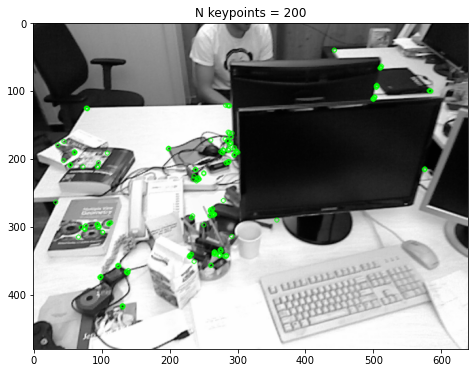

In [36]:
img = cv2.imread('tests/00_test_slam_input/rgb_with_poses/000000.png', 0)

orb = cv2.ORB_create(nfeatures=200)
kp, des = orb.detectAndCompute(img, None)
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
print(f'Descriptors shape = {des.shape}')

plt.figure(figsize=(12, 6))
plt.imshow(img2)
plt.title(f'N keypoints = {len(kp)}')
plt.show()

In [58]:
import os
from common.dataset import Dataset
from common.trajectory import Trajectory

In [71]:
data_dir = 'tests/00_test_slam_input'
rgb = Dataset.read_dict_of_lists(os.path.join(data_dir, 'rgb.txt'))
known_poses = Dataset.read_dict_of_lists(os.path.join(data_dir, 'known_poses.txt'))

rgb[0], known_poses[0]

('rgb_with_poses/000000.png',
 ['1.3390429617085644',
  '0.6235776860273197',
  '1.6559810006210114',
  '0.6574280826403377',
  '0.612626168885718',
  '-0.29491259746065657',
  '-0.32481387472099443'])

In [78]:
%%time
descriptors = {}

for frame_id, img_name in rgb.items():
    path = f'{data_dir}/{img_name}'
    img = cv2.imread(path, 0)
    orb = cv2.ORB_create(nfeatures=200)
    kp, des = orb.detectAndCompute(img, None)
    descriptors[frame_id] = des

CPU times: user 2.08 s, sys: 58.7 ms, total: 2.14 s
Wall time: 2.14 s


In [79]:
len(descriptors), descriptors[0].shape

(100, (200, 32))

In [75]:
with open('descriptors.pickle', 'wb') as f:
    pickle.dump(descriptors, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('descriptors.pickle', 'rb') as f:
#     descrs = pickle.load(f)

### 2. For every pair of known cameras

a.  Match the keypoints

In [ ]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
plt.imshow(img3),plt.show()

In [ ]:
img = cv2.imread('tests/00_test_slam_input/rgb_with_poses/000000.png', 0)

orb = cv2.ORB_create(nfeatures=200)
kp, des = orb.detectAndCompute(img, None)
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
print(f'Descriptors shape = {des.shape}')

plt.figure(figsize=(12, 6))
plt.imshow(img2)
plt.title(f'N keypoints = {len(kp)}')
plt.show()

b. Filter wrong matches

c. Save inliers

* Intrinsic matrix allows to transform 3D coordinates to 2D coordinates on an image plane

In [ ]:
    # define the intrinsic matrix
    K = np.array([[525.0, 0.0, 319.5], 
                  [0.0, 525.0, 239.5], 
                  [0.0, 0.0, 1.0]])
    print("\nCamera intrinsic matrix\n", K)

In [ ]:
FILE_HEADER = '#frame_id tx ty tz qx qy qz qw\n'


tx ty tz - 3D position projection centers
qx qy qz qw - unit quaternion for rotation matrix